In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.grid as gxgrid
import geosoft.gxpy.utility as gxu
from IPython.display import Image
gxc = gx.GXpy()

In [2]:
print(gxc.folder_workspace)

C:\Users\ianne\Documents\GitHubRepos\MakiMade\Sandbox\


In [3]:
g=gxgrid.Grid.open(gxc.folder_workspace+'BigIslandDEM.GRD')

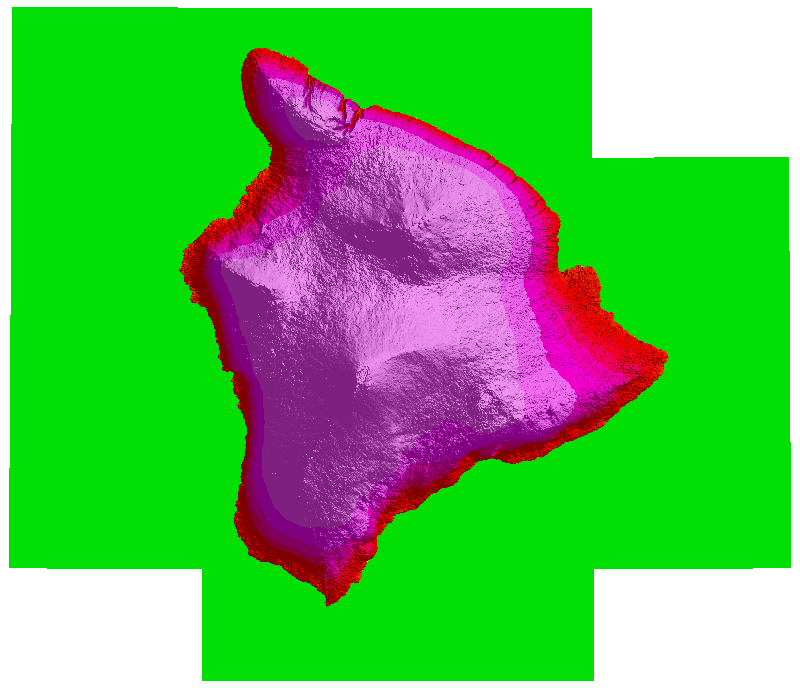

In [4]:
Image(g.image_file(shade=True, pix_width=800))

In [5]:
import pprint

In [6]:
pp = pprint.PrettyPrinter(indent=3)

In [7]:
pp.pprint(g.__dict__)

{  '_buffer_np': None,
   '_buffer_x': None,
   '_buffer_y': None,
   '_buffered_row': None,
   '_buffered_xy': None,
   '_cos_rot': 1.0,
   '_cs': None,
   '_decoration': '',
   '_delete_files': False,
   '_dtype': dtype('float32'),
   '_dummy': -1e+32,
   '_file_name': 'C:\\Users\\ianne\\Documents\\GitHubRepos\\MakiMade\\Sandbox\\BigIslandDEM.GRD',
   '_gxobj': None,
   '_gxpg': None,
   '_gxtype': 4,
   '_hgd': False,
   '_hgd_name': None,
   '_img': <geosoft.gxapi.GXIMG.GXIMG object at 0x000001EB033DA300>,
   '_is_int': False,
   '_metadata': None,
   '_metadata_changed': False,
   '_metadata_root': '',
   '_mode': 0,
   '_name': 'C:\\Users\\ianne\\Documents\\GitHubRepos\\MakiMade\\Sandbox\\BigIslandDEM',
   '_next': 0,
   '_next_col': 0,
   '_next_row': 0,
   '_open': -1,
   '_readonly': True,
   '_sin_rot': -0.0}


In [8]:
pp.pprint(g.properties())

{  'coordinate_system': <class 'geosoft.gxpy.coordinate_system.Coordinate_system'>({'_dict': None, '_gxapi_ipj': <geosoft.gxapi.GXIPJ.GXIPJ object at 0x000001EB1DA4EE40>}),
   'decoration': '',
   'dtype': dtype('float32'),
   'dx': 60.0,
   'dy': 60.0,
   'gridtype': 'GRD',
   'is_color': False,
   'nx': 3585,
   'ny': 3085,
   'rot': -0.0,
   'unit_of_measure': '',
   'x0': -107520.0,
   'y0': -92220.0}


In [9]:
print(g.properties()['coordinate_system'])

WGS 84 / *Lambert Conic Conformal (1SP)


In [10]:
pp.pprint(g.statistics())

{  'geometric_mean': 713.8074754264468,
   'kurtosis': 4.663179126040802,
   'max': 4209.7490234375,
   'mean': 380.72534454844134,
   'min': -5.464443206787109,
   'num_data': 9083988.0,
   'num_dummy': 1975737.0,
   'sd': 760.016461865439,
   'skew': 2.246495733743305,
   'sum': 3458504461.1739063,
   'sum_power_2': 6563878496109.354,
   'sum_power_3': 1.5453297852549926e+16,
   'sum_power_4': 4.162392808144065e+19,
   'variance': 577625.0223064604}


In [11]:
print(g)

<class Grid>: C:\Users\ianne\Documents\GitHubRepos\MakiMade\Sandbox\BigIslandDEM.GRD(GRD) (3585, 3085)


In [12]:
import numpy as np

In [13]:
data = g.np()

In [14]:
# report data stats
ndata = data.shape[0] * data.shape[1]
ndum = np.isnan(data).sum()
ndat = np.isfinite(data).sum()
print(ndata, ndum, ndat, (ndat+ndum))

11059725 1975737 9083988 11059725


In [15]:
# replace dummy (nan) values with 0
data[np.where(np.isnan(data))] = 0.
ndum = np.isnan(data).sum()
ndat = np.isfinite(data).sum()
print(ndata, ndum, ndat, (ndat+ndum))

11059725 0 11059725 11059725


In [16]:
# create a new grid from array, which now has no dummies
newdem = gxgrid.Grid.from_data_array(data, properties=g.properties())

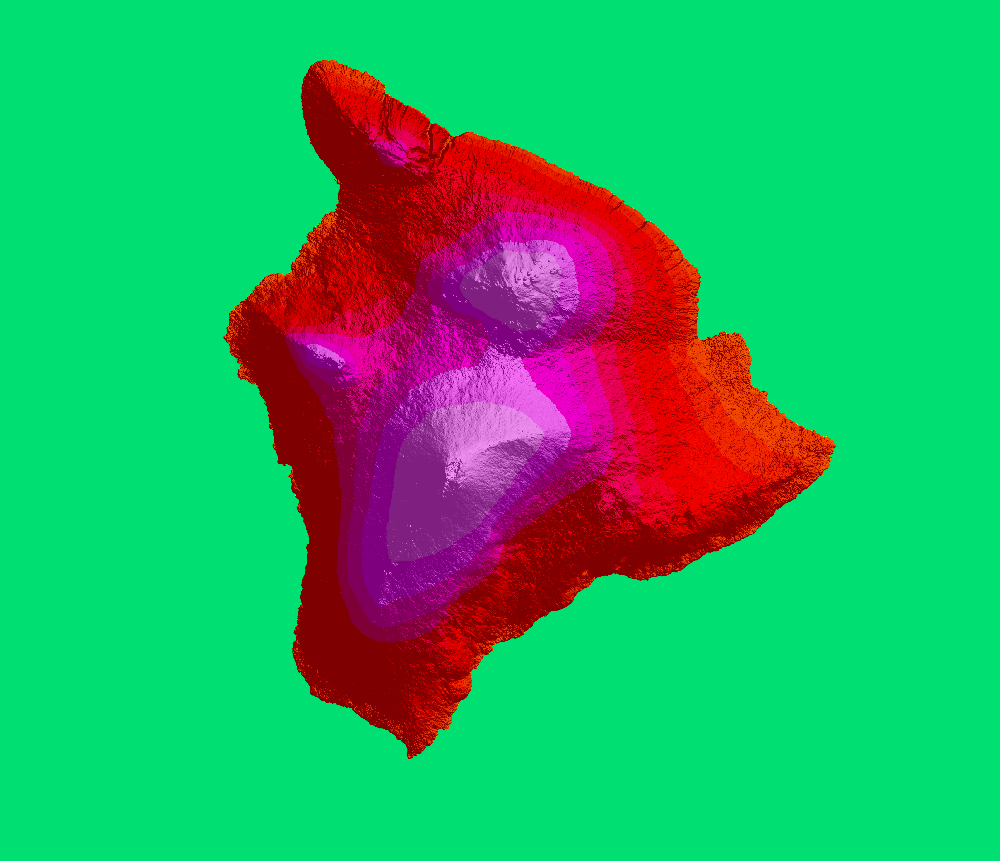

In [17]:
Image(newdem.image_file(shade=True, pix_width=1000))